In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

import data_preprocessing  # Assuming this is your custom module


In [2]:
original_data = pd.read_csv('rentfaster.csv')
#data = data_preprocessing.process_data(original_data)
all_data = data_preprocessing.process_data(original_data)
data = all_data.sample(n=100, random_state=42)

# original_data.head()
data.head()

,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
7500,77.0,0.0,727.0,53.416584,-113.527816,3.0,5.0,2700.0,3,2.5,2000.00000,0,30.0,0,0,0
13420,39.0,0.0,3733.0,51.115760,-113.915267,2.0,7.0,3000.0,5,4.0,895.83585,0,61.0,0,0,0
13706,39.0,0.0,4038.0,50.853791,-113.999777,2.0,5.0,2700.0,3,2.5,895.83585,2,75.0,0,0,0
3113,39.0,0.0,1511.0,51.038769,-114.079079,2.0,1.0,3000.0,2,2.0,805.00000,0,30.0,0,2,2
19313,168.0,7.0,3493.0,44.292553,-78.345153,2.0,1.0,2000.0,2,1.0,895.83585,0,30.0,0,2,2


# KNN Model for Predicting Lease Terms

## Step 1: Data Preparation

1. **Data Collection:**
   - Gather data on properties, including features such as price, location, type, availability, and lease term (target variable).

2. **Data Cleaning:**
   - Handle missing values by imputation or removal.
   - Remove duplicates and correct inconsistencies in the dataset.

3. **Feature Engineering:**
   - Convert categorical variables into numerical ones using techniques like one-hot encoding.
   - Normalize or standardize numerical features to ensure all features contribute equally to the distance calculations in KNN.

4. **Data Splitting:**
   - Split the data into training and testing sets (e.g., 80% training, 20% testing).



In [3]:
data = all_data.sample(n=100, random_state=42)
X = data.drop('lease_term', axis=1)  # Drop the target column to get the features
y = data['lease_term']  # Select the target column



print(X.head())
print(y.head())


# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        city  province  address   latitude   longitude  type   price  beds  \
7500    77.0       0.0    727.0  53.416584 -113.527816   5.0  2700.0     3   
13420   39.0       0.0   3733.0  51.115760 -113.915267   7.0  3000.0     5   
13706   39.0       0.0   4038.0  50.853791 -113.999777   5.0  2700.0     3   
3113    39.0       0.0   1511.0  51.038769 -114.079079   1.0  3000.0     2   
19313  168.0       7.0   3493.0  44.292553  -78.345153   1.0  2000.0     2   

       baths     sq_feet  furnishing  availability_date  smoking  cats  dogs  
7500     2.5  2000.00000           0               30.0        0     0     0  
13420    4.0   895.83585           0               61.0        0     0     0  
13706    2.5   895.83585           2               75.0        0     0     0  
3113     2.0   805.00000           0               30.0        0     2     2  
19313    1.0   895.83585           0               30.0        0     2     2  
7500     3.0
13420    2.0
13706    2.0
3113     2.0
19313

## Step 2: Model Implementation

1. **Choose K:**
   - Experiment with different values of \( k \) (number of neighbors) to find the optimal one. Use techniques like cross-validation to determine the best \( k \).

2. **Model Training:**
   - Implement the KNN algorithm using a library like scikit-learn.
   - Train the model on the training dataset.




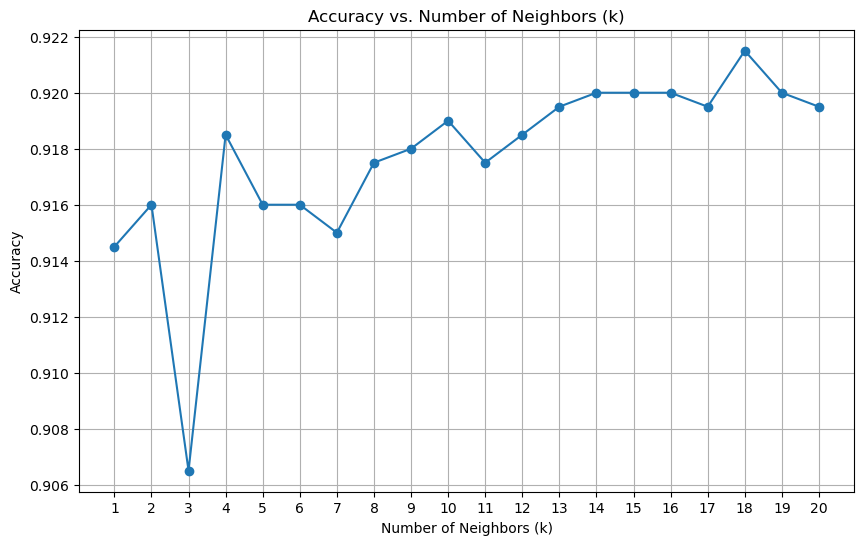

In [4]:

# Assuming 'lease_term' should be categorical
# Convert 'lease_term' to categorical if it's numeric
if all_data['lease_term'].dtype in ['int64', 'float64']:
    all_data['lease_term'] = all_data['lease_term'].astype('category').cat.codes

data = all_data.sample(n=9999, random_state=42)
X = data.drop('lease_term', axis=1)  # Features
y = data['lease_term']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the KNN classifier
# knn = KNeighborsClassifier(n_neighbors=3)  # Example with k=3
# knn.fit(X_train, y_train)

# # Define the parameter grid for k
# param_grid = {'n_neighbors': np.arange(1, 21)}

# # Initialize the KNN classifier
# knn = KNeighborsClassifier()

# # Use GridSearchCV to find the best k
# grid_search = GridSearchCV(knn, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Get the best k
# best_k = grid_search.best_params_['n_neighbors']
# print(f"Optimal number of neighbors: {best_k}")


# # Train the KNN model with the optimal k
# knn_best = KNeighborsClassifier(n_neighbors=best_k)
# knn_best.fit(X_train, y_train)

# # Evaluate the model
# accuracy = knn_best.score(X_test, y_test)
# print(f"Model accuracy: {accuracy:.4f}")



# Define a range of k values to test
k_values = range(1, 21)
accuracies = []

# Loop over the range of k values
for k in k_values:
    # Initialize and train the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()




c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Iteration 1: Model accuracy: 0.9050


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Iteration 2: Model accuracy: 0.9300


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 3: Model accuracy: 0.9150


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 4: Model accuracy: 0.9050


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 5: Model accuracy: 0.9500


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Iteration 6: Model accuracy: 0.9250


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 7: Model accuracy: 0.9200


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Iteration 8: Model accuracy: 0.9250


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Iteration 9: Model accuracy: 0.9250


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Iteration 10: Model accuracy: 0.9350
Mean accuracy over 10 iterations: 0.9235
Standard deviation of accuracy: 0.0129


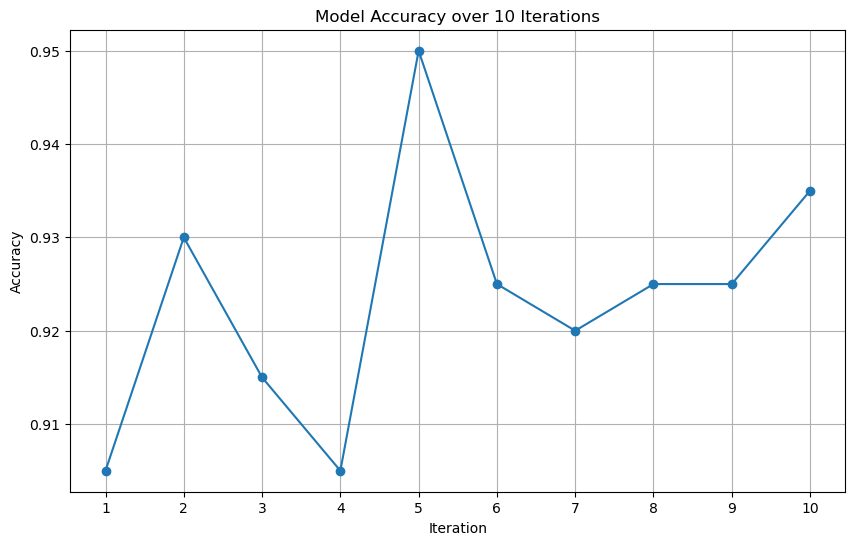

In [5]:

# Initialize a list to store accuracies
accuracies = []

# Perform the process 10 times
for i in range(10):
    # Sample the data
    data = all_data.sample(n=999, random_state=42 + i)  # Change random_state for different samples
    X = data.drop('lease_term', axis=1)
    y = data['lease_term']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Use GridSearchCV to find the best k
    param_grid = {'n_neighbors': np.arange(1, 21)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_k = grid_search.best_params_['n_neighbors']

    # Train the KNN model with the optimal k
    knn_best = KNeighborsClassifier(n_neighbors=best_k)
    knn_best.fit(X_train, y_train)

    # Evaluate the model
    accuracy = knn_best.score(X_test, y_test)
    accuracies.append(accuracy)
    print(f"Iteration {i+1}: Model accuracy: {accuracy:.4f}")

# Calculate mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean accuracy over 10 iterations: {mean_accuracy:.4f}")
print(f"Standard deviation of accuracy: {std_accuracy:.4f}")

# Plot accuracies over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o')
plt.title('Model Accuracy over 10 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



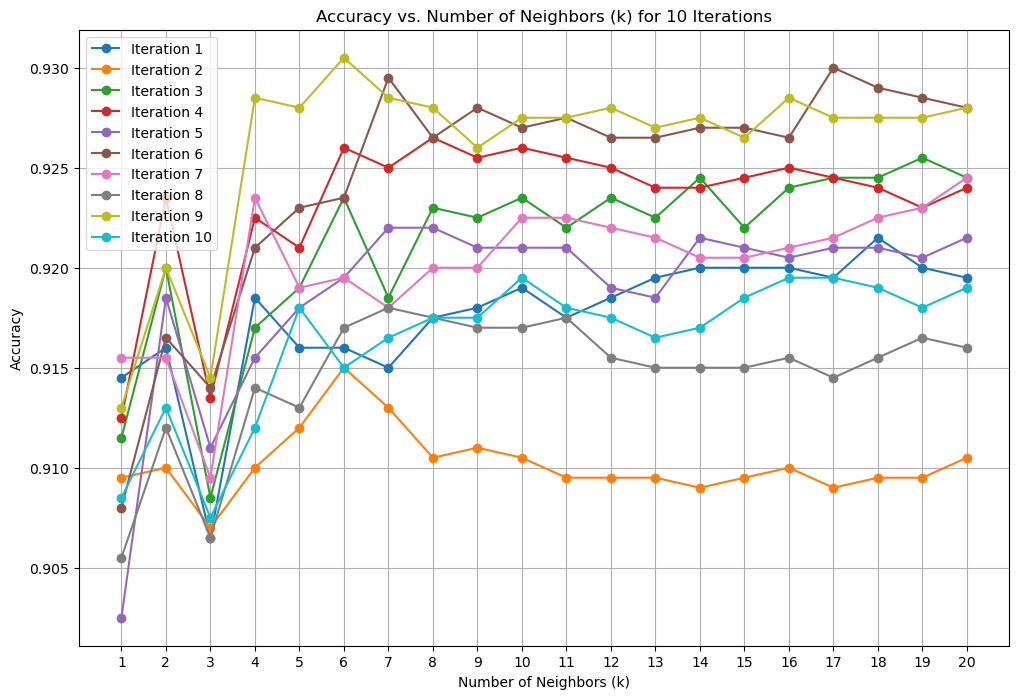

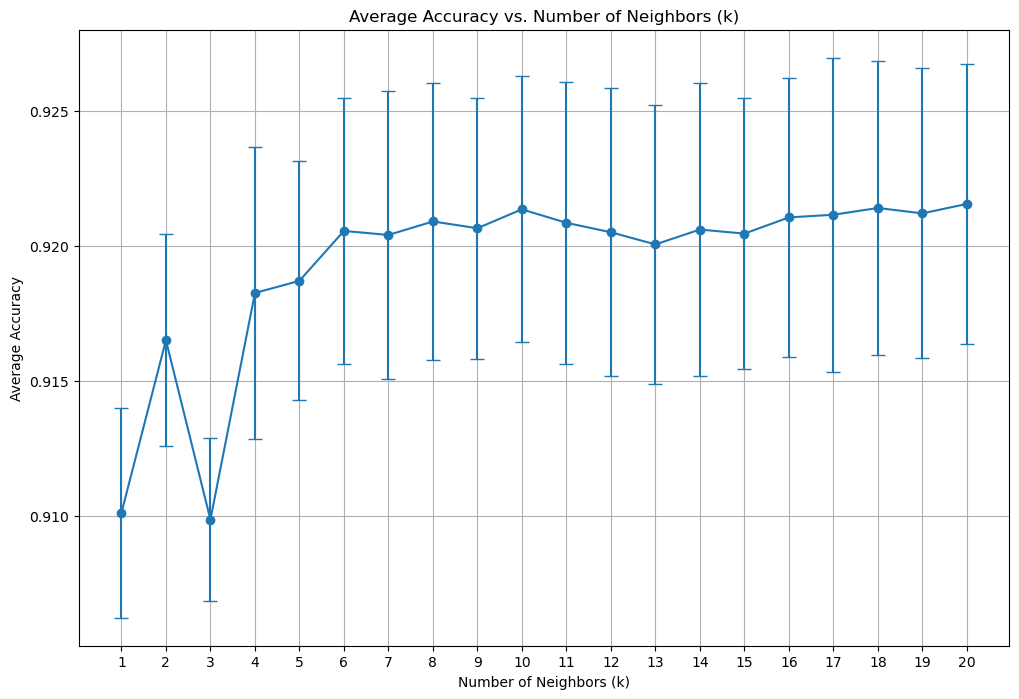

In [9]:


# Define a range of k values to test
k_values = range(1, 21)

# Initialize a list to store accuracies for each iteration
all_accuracies = []

# Perform the process 10 times
for i in range(10):
    # Sample the data
    data = all_data.sample(n=9999, random_state=42 + i)
    X = data.drop('lease_term', axis=1)
    y = data['lease_term']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Store accuracies for this iteration
    accuracies = []

    # Loop over the range of k values
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    all_accuracies.append(accuracies)

# Plot all iterations
plt.figure(figsize=(12, 8))
for i, accuracies in enumerate(all_accuracies):
    plt.plot(k_values, accuracies, marker='o', label=f'Iteration {i+1}')

plt.title('Accuracy vs. Number of Neighbors (k) for 10 Iterations')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


# Calculate average accuracy and standard deviation for each k
average_accuracies = np.mean(all_accuracies, axis=0)
std_accuracies = np.std(all_accuracies, axis=0)

# Plot average accuracy with error bars
plt.figure(figsize=(12, 8))
plt.errorbar(k_values, average_accuracies, yerr=std_accuracies, fmt='-o', capsize=5)
plt.title('Average Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find the best k based on average accuracy
best_k_index = np.argmax(average_accuracies)
best_k = k_values[best_k_index]



## Step 3: Model Evaluation

1. **Accuracy:**
   - Calculate the accuracy of the model on the test dataset.

2. **Precision and Recall:**
   - Compute precision to assess the accuracy of positive lease term predictions.
   - Calculate recall to evaluate the model's ability to identify actual long or short lease terms.

3. **F1 Score:**
   - Determine the F1 score to provide a balance between precision and recall.

4. **Confusion Matrix:**
   - Generate a confusion matrix to visualize true positives, false positives, true negatives, and false negatives.


Accuracy: 0.9275
Precision: 0.8863
Recall: 0.9275
F1 Score: 0.8959


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


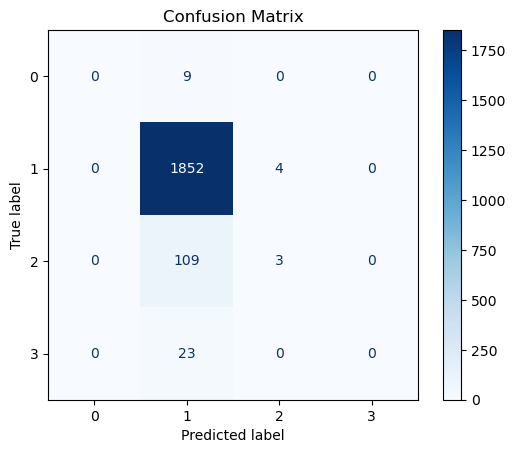

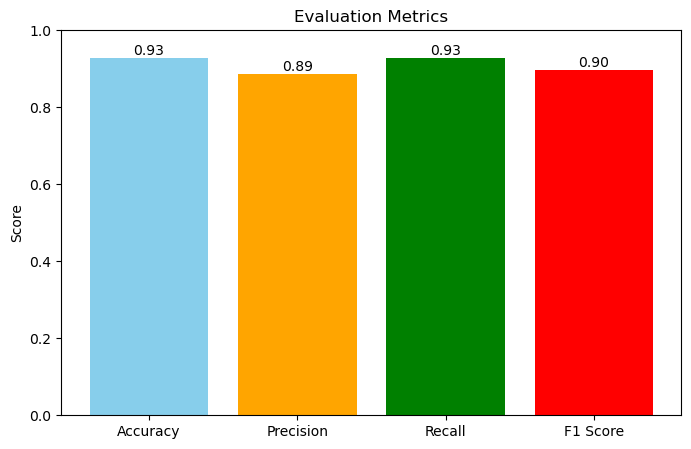

In [7]:


# Assuming X and y are your features and target variables
# Split the dataset
data = all_data.sample(n=10000, random_state=42)
X = data.drop('lease_term', axis=1)  # Drop the target column to get the features
y = data['lease_term']  # Select the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


## Step 4: Model Optimization

### Hyperparameter Tuning
- Adjust \( k \) and other hyperparameters to improve model performance, using techniques like grid search or random search.

### Feature Selection
- Identify and retain the most impactful features, possibly reducing dimensionality with techniques like PCA.



Accuracy: 0.9292
Precision: 0.9164
Recall: 0.9292
F1 Score: 0.9172


c:\Users\Leo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


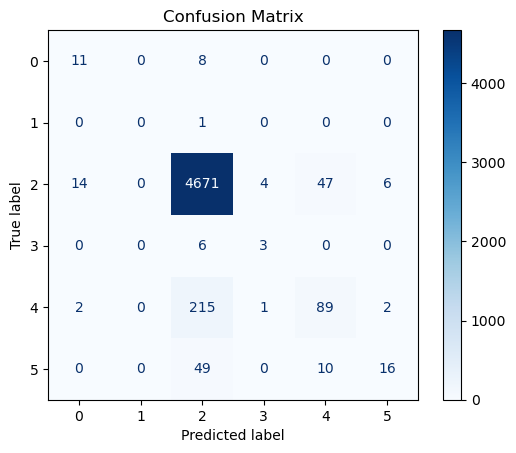

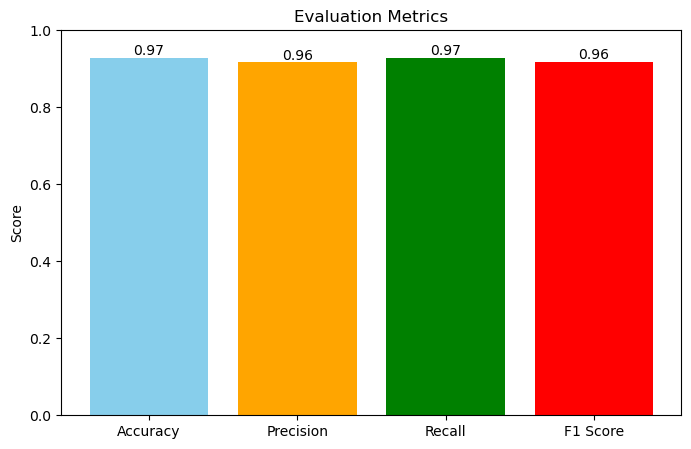

In [8]:
# data = all_data.sample(n=10000, random_state=42)
X = all_data.drop(['lease_term', 'smoking', 'furnishing'], axis=1)  # Drop the target column to get the features
y = all_data['lease_term']  # Select the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier with k=20
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Evaluation Metrics')
plt.ylabel('Score')

# Add value labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval+0.04:.2f}', ha='center', va='bottom')

plt.show()


End of analysis